# Import necessary libraries

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


# Dataset

In [2]:
data = {
    'Character': ['ShadowFang', 'IronTusk', 'Arcana', 'ThunderBlaze', 'PhantomStrike', 'BruteHammer'],
    'Speed' : [8,3,4,6,7,2],
    'Strength' : [7,9,2,6,4,10],
    'Defense' : [5,8,3,6,4,9],
    'Magic' : [2,1,9,3,4,1],
    'Range' : [6,4,8,5,9,3],
    'Agility' : [9,2,5,6,8,1]
}
df = pd.DataFrame(data)



# Task 1: Standardize the dataset (excluding the Character column)

In [3]:
features = ['Speed', 'Strength', 'Defense', 'Magic', 'Range', 'Agility']
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



# Task 1: Apply PCA with 3 components and display the results

In [4]:
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)



# Convert PCA results to a DataFrame

In [5]:
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])
df_pca['Character'] = df['Character']



# Display the PCA results

In [6]:
print("PCA Results with 3 Principal Components:")
print(df_pca)


PCA Results with 3 Principal Components:
        PC1       PC2       PC3      Character
0 -0.901859  1.787990 -0.265045     ShadowFang
1  2.323986 -0.218862  0.212348       IronTusk
2 -2.347454 -2.058233 -0.211582         Arcana
3 -0.058673  0.488568 -0.420936   ThunderBlaze
4 -2.218756  0.494975  0.636073  PhantomStrike
5  3.202758 -0.494438  0.049142    BruteHammer


# Task 1: Create a 3D scatter plot of the transformed data (without labels)

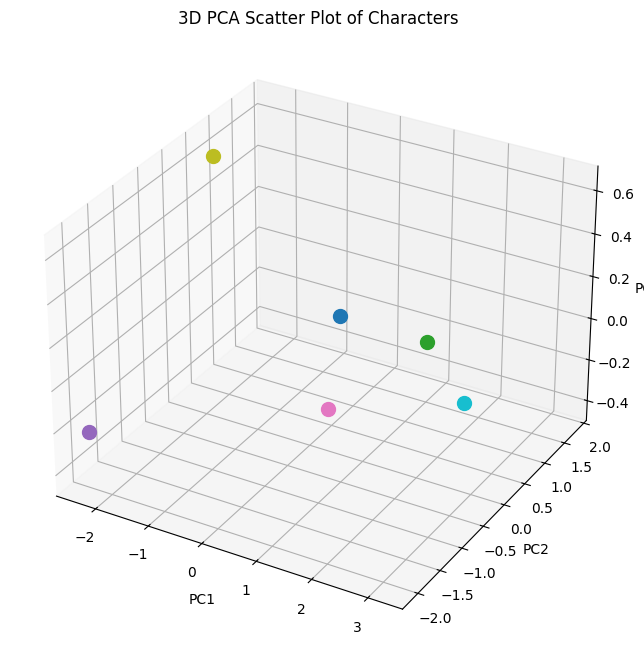

In [7]:
n_characters = df_pca.shape[0]
colors = plt.get_cmap('tab10', n_characters)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_characters):
    ax.scatter(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['PC3'][i],
               s=100, color=colors(i))

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D PCA Scatter Plot of Characters")
plt.show()

# Task 1: Add labels (character names) to each point in the 3D scatter plot

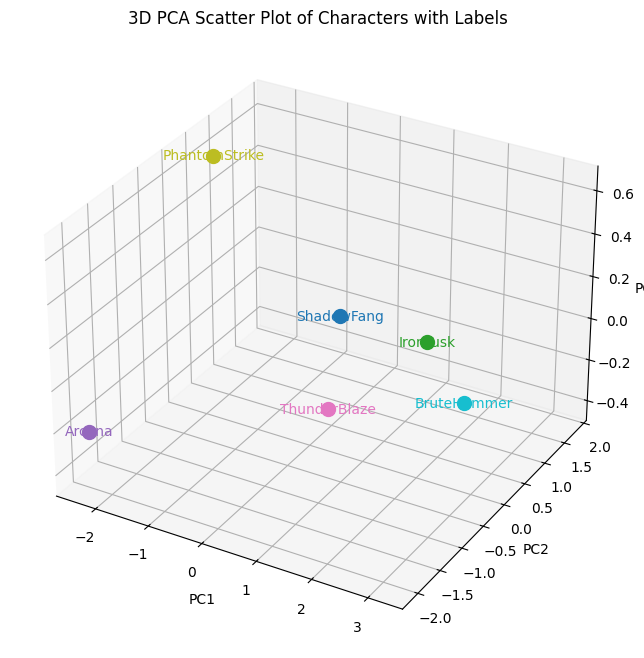

In [8]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_characters):
    ax.scatter(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['PC3'][i],
               s=100, color=colors(i))
    ax.text(df_pca['PC1'][i], df_pca['PC2'][i], df_pca['PC3'][i],
            df_pca['Character'][i],
            color=colors(i),
            fontsize=10,
            ha='center', va='center')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.title("3D PCA Scatter Plot of Characters with Labels")
plt.show()



# Task 2: t-SNE Dimensionality Reduction and Visualization

In [9]:


from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting



# Task 2: Standardize the dataset (exclude the Character column)


In [10]:

features = ['Speed', 'Strength', 'Defense', 'Magic', 'Range', 'Agility']
X = df[features]





# Standardization


In [11]:
X_scaled = StandardScaler().fit_transform(X)

# Task 2: Apply t-SNE with 3 components (or 2 if preferred)
# For small datasets, perplexity must be less than the number of samples

In [12]:
tsne = TSNE(n_components=3, random_state=42, perplexity=2)
X_tsne = tsne.fit_transform(X_scaled)

# Convert t-SNE results to DataFrame
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2', 'TSNE3'])
df_tsne['Character'] = df['Character']

# Display t-SNE results
print("t-SNE Results (3 Components):")
print(df_tsne)



t-SNE Results (3 Components):
        TSNE1       TSNE2       TSNE3      Character
0   -3.848548 -255.536499 -200.893204     ShadowFang
1  167.099365  -81.002220   62.882507       IronTusk
2  -15.287618  122.449493 -163.456223         Arcana
3  -82.002983  265.502686  249.798553   ThunderBlaze
4 -141.924332 -104.359375 -109.156342  PhantomStrike
5   31.136482   20.464520  162.189102    BruteHammer


# Task 2: Create a 3D scatter plot of the transformed data

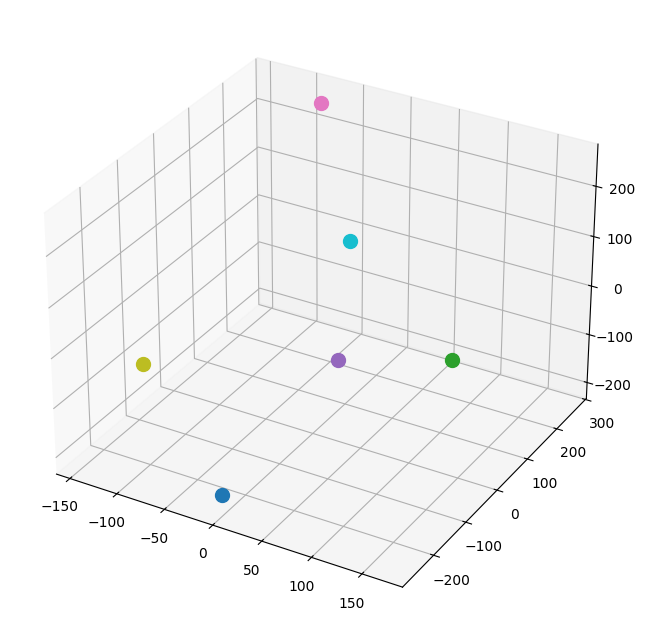

In [13]:
n_characters = df_tsne.shape[0]
colors = plt.get_cmap('tab10', n_characters)

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_characters):
    ax.scatter(df_tsne['TSNE1'][i], df_tsne['TSNE2'][i], df_tsne['TSNE3'][i],
               s=100, color=colors(i))



# Task 2: Label each point with the character name

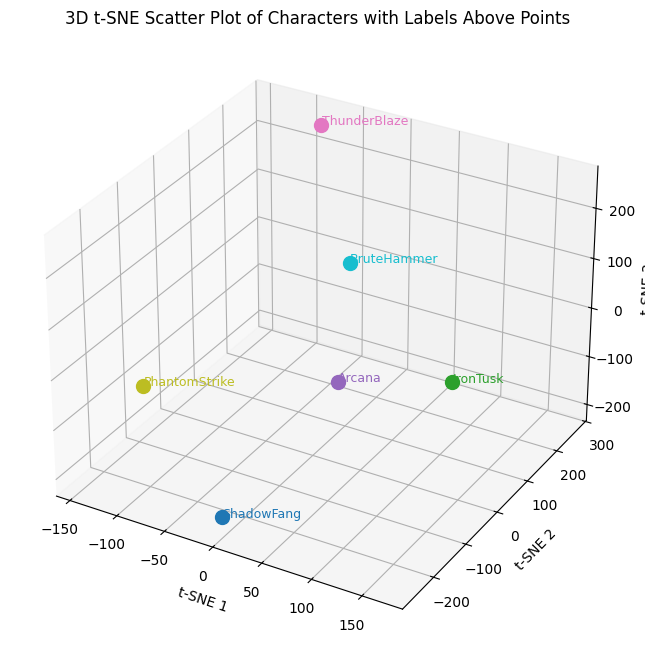

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(df)):
    ax.scatter(X_tsne[i,0], X_tsne[i,1], X_tsne[i,2], color=colors(i), s=100)
    # Add label in the same color as the point
    ax.text(X_tsne[i,0]+0.3, X_tsne[i,1], X_tsne[i,2], df['Character'][i], color=colors(i), fontsize=9)

plt.title("3D t-SNE Scatter Plot of Characters with Labels Above Points")
ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
plt.show()